In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Cloth Recommendation

/content/drive/MyDrive/Colab Notebooks/Cloth Recommendation


In [1]:
#Load libraries
import pandas as pd
import numpy as np
from scipy.stats import iqr

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import joblib
import re
import os
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC#Load libraries
import pandas as pd
import numpy as np
from scipy.stats import iqr

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import joblib
import re
import os
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset/modcloth_final_data.json', lines=True)
df = df[['item_id','waist','quality','cup size','hips','bra size','category','bust','height','user_name','length','fit','user_id','shoe size','shoe width','size']]
#Print the first 5 rows of the dataframe.
df.head()


,item_id,waist,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,size
0,123373,29.0,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,7
1,123373,31.0,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,13
2,123373,30.0,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,7
3,123373,NaN,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,21
4,123373,NaN,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     82790 non-null  int64  
 1   waist       2882 non-null   float64
 2   quality     82722 non-null  float64
 3   cup size    76535 non-null  object 
 4   hips        56064 non-null  float64
 5   bra size    76772 non-null  float64
 6   category    82790 non-null  object 
 7   bust        11854 non-null  object 
 8   height      81683 non-null  object 
 9   user_name   82790 non-null  object 
 10  length      82755 non-null  object 
 11  fit         82790 non-null  object 
 12  user_id     82790 non-null  int64  
 13  shoe size   27915 non-null  float64
 14  shoe width  18607 non-null  object 
 15  size        82790 non-null  int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 10.1+ MB


In [3]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
item_id,0,0.000000
waist,79908,96.518903
quality,68,0.082136
cup size,6255,7.555260
hips,26726,32.281677
bra size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118
user_name,0,0.000000


In [4]:
df[['h_foot', 'h_inches']] = df['height'].str.split(' ', 1, expand=True)

In [5]:
df['h_foot'] = df['h_foot'].str.extract("([-+]?\d*\.\d+|[-+]?\d+)").astype(float)
df['h_inches'] = df['h_inches'].str.extract("([-+]?\d*\.\d+|[-+]?\d+)").astype(float)

In [6]:
df["height"] = df["h_foot"].astype(float)*30.48 + df["h_inches"].astype(float)*2.54

In [7]:
del df['h_foot']
del df['h_inches']

In [8]:
df['bust'] = df['bust'].str.extract("([-+]?\d*\.\d+|[-+]?\d+)").astype(float)

In [9]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [10]:
df['quality'] = df['quality'].astype(float)
df['waist'] = df['waist'].astype(float)
df['hips'] = df['hips'].astype(float)
df['bra size'] = df['bra size'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 1069 to 82654
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     515 non-null    int64  
 1   waist       515 non-null    float64
 2   quality     515 non-null    float64
 3   cup size    515 non-null    object 
 4   hips        515 non-null    float64
 5   bra size    515 non-null    float64
 6   category    515 non-null    object 
 7   bust        515 non-null    float64
 8   height      515 non-null    float64
 9   user_name   515 non-null    object 
 10  length      515 non-null    object 
 11  fit         515 non-null    object 
 12  user_id     515 non-null    int64  
 13  shoe size   515 non-null    float64
 14  shoe width  515 non-null    object 
 15  size        515 non-null    int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 68.4+ KB


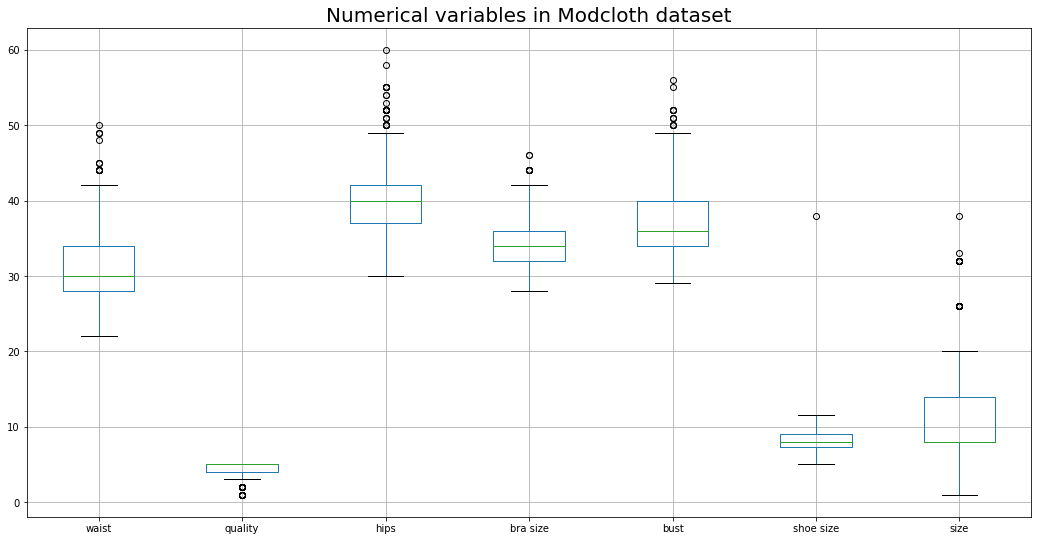

In [12]:
num_cols = ['waist','quality','hips','bra size','bust','shoe size','size']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

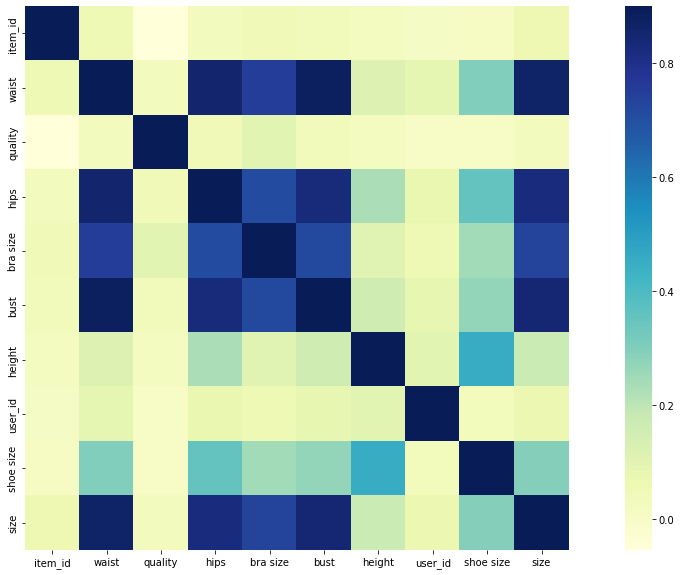

In [14]:
corrmat = df.corr()
plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.9, cmap="YlGnBu", square=True)


In [15]:
del df['cup size']
del df['category']
del df['user_name']
del df['length']
del df['fit']
del df['shoe width']

In [16]:
df

,item_id,waist,quality,hips,bra size,bust,height,user_id,shoe size,size
1069,126560,30.0,5.0,40.0,36.0,36.0,170.18,88648,8.5,8
1750,129268,27.0,4.0,34.0,34.0,38.0,149.86,228374,8.0,8
1751,129268,33.0,1.0,36.0,38.0,38.0,160.02,317289,7.5,12
2336,130424,49.0,5.0,51.0,42.0,51.0,167.64,789325,9.5,32
2367,131951,31.0,5.0,41.0,34.0,36.0,167.64,4272,8.5,8
...,...,...,...,...,...,...,...,...,...,...
80581,795647,28.0,5.0,39.0,36.0,36.0,165.10,596043,8.0,8
80851,800975,31.0,2.0,39.0,36.0,39.0,167.64,825897,8.0,15
80932,801763,36.0,3.0,42.0,38.0,44.0,160.02,845475,6.5,15
80942,803464,30.0,1.0,40.0,36.0,35.0,162.56,680585,8.0,8


[0.14229219 0.15773097 0.06923255 0.1296041  0.09044468 0.14157309
 0.08408896 0.10171336 0.08332011]


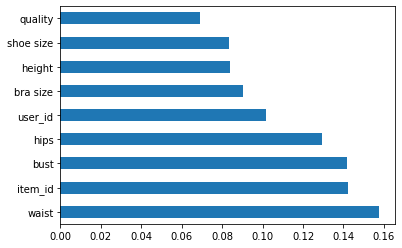

In [17]:
X = df.iloc[:,0:9]  #independent columns
y = df.iloc[:,-1]    #target column 

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [18]:
del df['quality']
del df['height']
del df['user_id']
del df['shoe size']
del df['bra size']

In [19]:
cols = ['hips', 'bust', 'size', 'waist']
# Computing IQR
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

In [21]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
#defining range to identify data points lying outside the range(lower bound & upperbound). they are outliers).
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

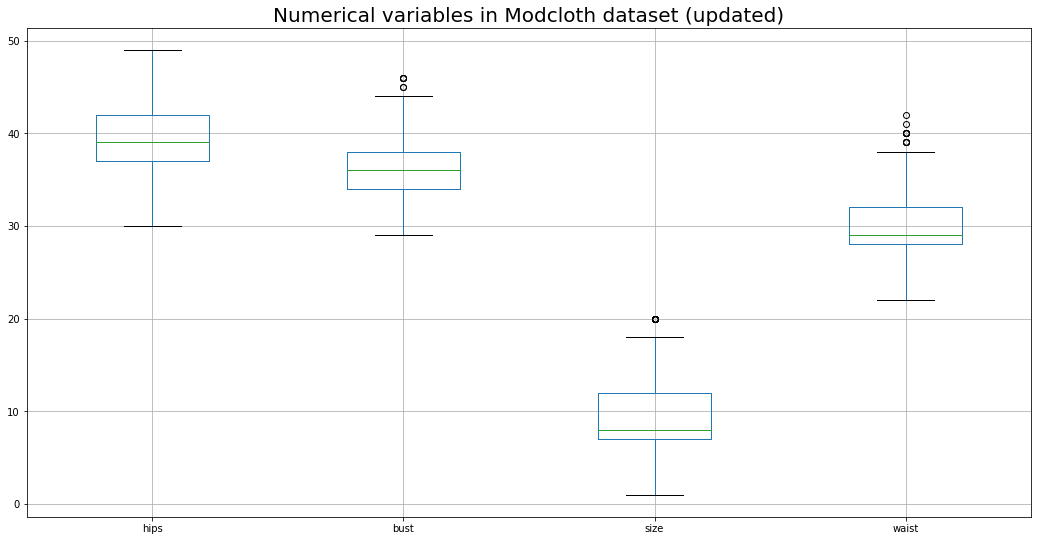

In [22]:
num_cols = ['hips', 'bust', 'size', 'waist'] # one or more
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset (updated)", fontsize=20)
plt.show()

In [23]:
df['size'] = df['size'].astype(str)
df['item_id'] = df['item_id'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 1069 to 82654
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  471 non-null    object 
 1   waist    471 non-null    float64
 2   hips     471 non-null    float64
 3   bust     471 non-null    float64
 4   size     471 non-null    object 
dtypes: float64(3), object(2)
memory usage: 22.1+ KB


In [24]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
print(X)

[['126560' 30.0 40.0 36.0]
 ['129268' 27.0 34.0 38.0]
 ['129268' 33.0 36.0 38.0]
 ...
 ['801763' 36.0 42.0 44.0]
 ['803464' 30.0 40.0 35.0]
 ['807252' 30.0 39.0 32.0]]
